## Problem Statement

- Segmention of learners and cluster them on the basis of their job profile, company, and other features.

### Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("")

In [4]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
df.shape

(205843, 7)

205843 records present in the dataset

Checking datatype of each features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


Dropping the unwanted column

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [8]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [9]:
lis=['company_hash','job_position']

for i in lis:
    print(i, ': ',df[i].unique())
    print()

company_hash :  ['atrgxnnt xzaxv' 'qtrxvzwt xzegwgbb rxbxnta' 'ojzwnvwnxw vx' ...
 'ztdnowb xzwqtee' 'mrht onvnt axsxnvr' 'bvptbjnqxu td vbvkgz']

job_position :  ['Other' 'FullStack Engineer' 'Backend Engineer' ... 'Web / UI Designer'
 'Azure data Factory' 'Android Application developer']



In [10]:
df['job_position'].unique()[60:70]

array(['Operations Manager', 'Senior Engineer', 'Toyota',
       'Intern-data analyst', 'Senior Data Engineer', 'operation',
       'Associate  software  engineer ', 'Technical Manager ',
       'Senior SDET', 'Escalation Engineer'], dtype=object)

In [11]:
df[df['job_position']=='Data Scientist'].describe()

,orgyear,ctc,ctc_updated_year
count,5367.000000,5.368000e+03,5368.000000
mean,2013.869014,1.992280e+06,2019.316505
std,47.778543,8.006034e+06,1.055852
min,1.000000,4.000000e+03,2015.000000
25%,2013.000000,7.000000e+05,2019.000000
50%,2016.000000,1.200000e+06,2019.000000
75%,2018.000000,1.900000e+06,2020.000000
max,2204.000000,2.000000e+08,2021.000000


In [12]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


Checking unique emails and frequency of occurrence of the same email hash in the data

In [13]:
df['email_hash'].value_counts()[0:30]

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
aacf9473e3cee3e3f7c322e49bb8a6d5346bb05f3ff5bb9e9ac3ae22729ab933     7
10ac4f847a1d45c7f325ececfe44c04714b739a3317878c35b818eea61d232fa     7
e17d6b29cce52c81cdde98bfc8bc7cac002e2c8150029a06d2e79ddbf6b8b754     7
b46e8caae1e78618a00f05c423afeaae37819a36b4dbb3b8b26b6ed2966bd7a3     7
c832df

More than 10 people have 8 or more job or ctc change

In [14]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

Most of the people are working in 'nvnv wgzohrnvzwj otqcxwto' followed by 'xzegojo' and 'vbvkgz'

In [15]:
df['job_position'].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

## Data Preprocessing

### Outlier treatment


<AxesSubplot:ylabel='ctc'>

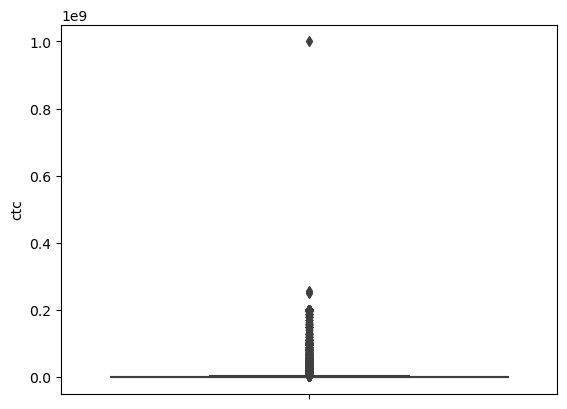

In [16]:
sns.boxplot(data=df,y='ctc')

<AxesSubplot:ylabel='orgyear'>

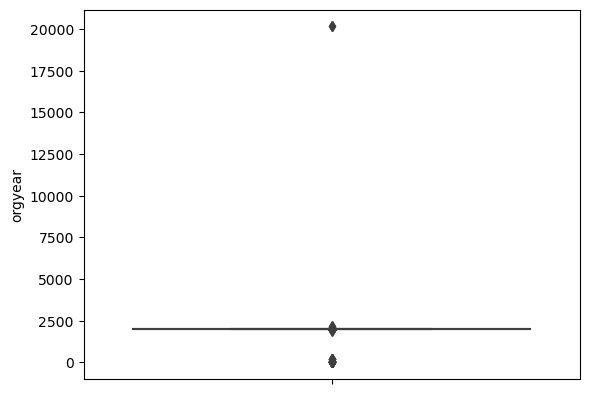

In [17]:
sns.boxplot(data=df,y='orgyear')

In [18]:
Q1 = np.percentile(df['ctc'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['ctc'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['ctc'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

df=df[(df['ctc']>low_lim) & (df['ctc']<up_lim)]

In [19]:
# Q1 = np.percentile(df['orgyear'], 25, interpolation = 'midpoint')
# Q2 = np.percentile(df['orgyear'], 50, interpolation = 'midpoint')
# Q3 = np.percentile(df['orgyear'], 75, interpolation = 'midpoint')
# IQR = Q3 - Q1
# low_lim = Q1 - 1.5 * IQR
# up_lim = Q3 + 1.5 * IQR

# df=df[(df['orgyear']>low_lim) & (df['orgyear']<up_lim)]

### Checking for duplicates in the dataset and drop them

In [20]:
df.shape

(192716, 6)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(192684, 6)

33 entries removed

### Update cant be before jo1ning

In [23]:
#_Update cant be before jo1ning
df ['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

### Making some new features (adding ‘Years of Experience’ column by subtracting orgyear from current year) 

In [24]:
df['Year of Experience']=2023-df['orgyear']

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
df['company_hash']=le.fit_transform(df['company_hash'])
df['job_position']=le.fit_transform(df['job_position'])

In [27]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0
1,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0
2,14789,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,136,2020.0,8.0
3,11533,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,136,2019.0,6.0
4,19288,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,276,2019.0,6.0


### RegX Cleaning

In [28]:
import re
def preprocess_string (string):
    new_string= re.sub('[A-Za-z]+', '', string).lower().strip()
    return new_string

In [29]:
df.job_position=df.job_position.apply(lambda x: preprocess_string(str(x)))
df.company_hash=df.company_hash.apply(lambda x: preprocess_string(str(x)))

## Visual analysis

### Univariate Analysis

[Text(0, 0, '-18142.0'),
 Text(1, 0, '-181.0'),
 Text(2, 0, '-84.0'),
 Text(3, 0, '-83.0'),
 Text(4, 0, '-78.0'),
 Text(5, 0, '-8.0'),
 Text(6, 0, '-6.0'),
 Text(7, 0, '-5.0'),
 Text(8, 0, '-4.0'),
 Text(9, 0, '-3.0'),
 Text(10, 0, '-2.0'),
 Text(11, 0, '-1.0'),
 Text(12, 0, '0.0'),
 Text(13, 0, '1.0'),
 Text(14, 0, '2.0'),
 Text(15, 0, '3.0'),
 Text(16, 0, '4.0'),
 Text(17, 0, '5.0'),
 Text(18, 0, '6.0'),
 Text(19, 0, '7.0'),
 Text(20, 0, '8.0'),
 Text(21, 0, '9.0'),
 Text(22, 0, '10.0'),
 Text(23, 0, '11.0'),
 Text(24, 0, '12.0'),
 Text(25, 0, '13.0'),
 Text(26, 0, '14.0'),
 Text(27, 0, '15.0'),
 Text(28, 0, '16.0'),
 Text(29, 0, '17.0'),
 Text(30, 0, '18.0'),
 Text(31, 0, '19.0'),
 Text(32, 0, '20.0'),
 Text(33, 0, '21.0'),
 Text(34, 0, '22.0'),
 Text(35, 0, '23.0'),
 Text(36, 0, '24.0'),
 Text(37, 0, '25.0'),
 Text(38, 0, '26.0'),
 Text(39, 0, '27.0'),
 Text(40, 0, '28.0'),
 Text(41, 0, '29.0'),
 Text(42, 0, '30.0'),
 Text(43, 0, '31.0'),
 Text(44, 0, '32.0'),
 Text(45, 0, '33.0'),

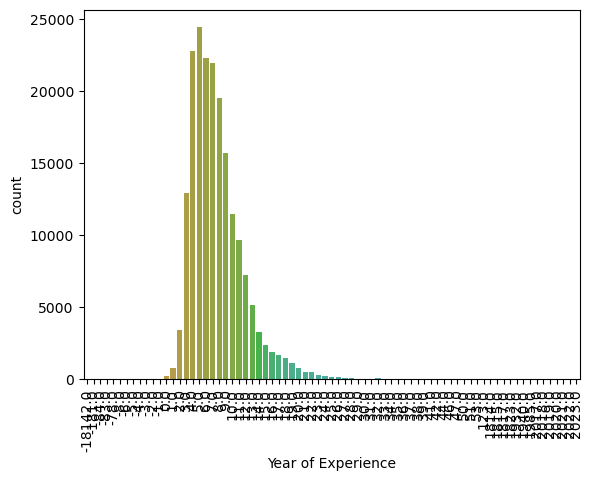

In [30]:
ax=sns.countplot(df['Year of Experience'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Most of the learners are in a given range experience

<AxesSubplot:xlabel='ctc', ylabel='Count'>

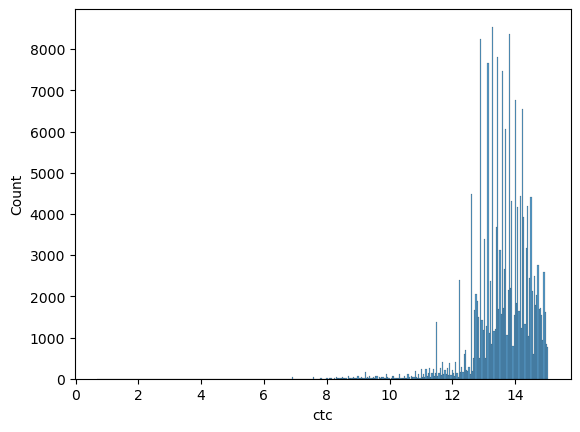

In [31]:
sns.histplot(np.log(df['ctc']))

Most of the learners are in a given range of ctc. So while switching job they will look for high paying jobs

### Bivariate Analysis

<AxesSubplot:>

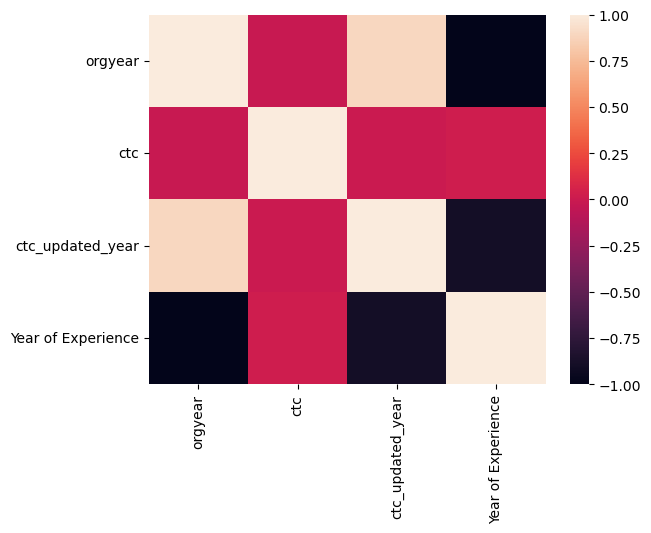

In [32]:
sns.heatmap(df.corr())

There is no significant correlation that can be noticed.

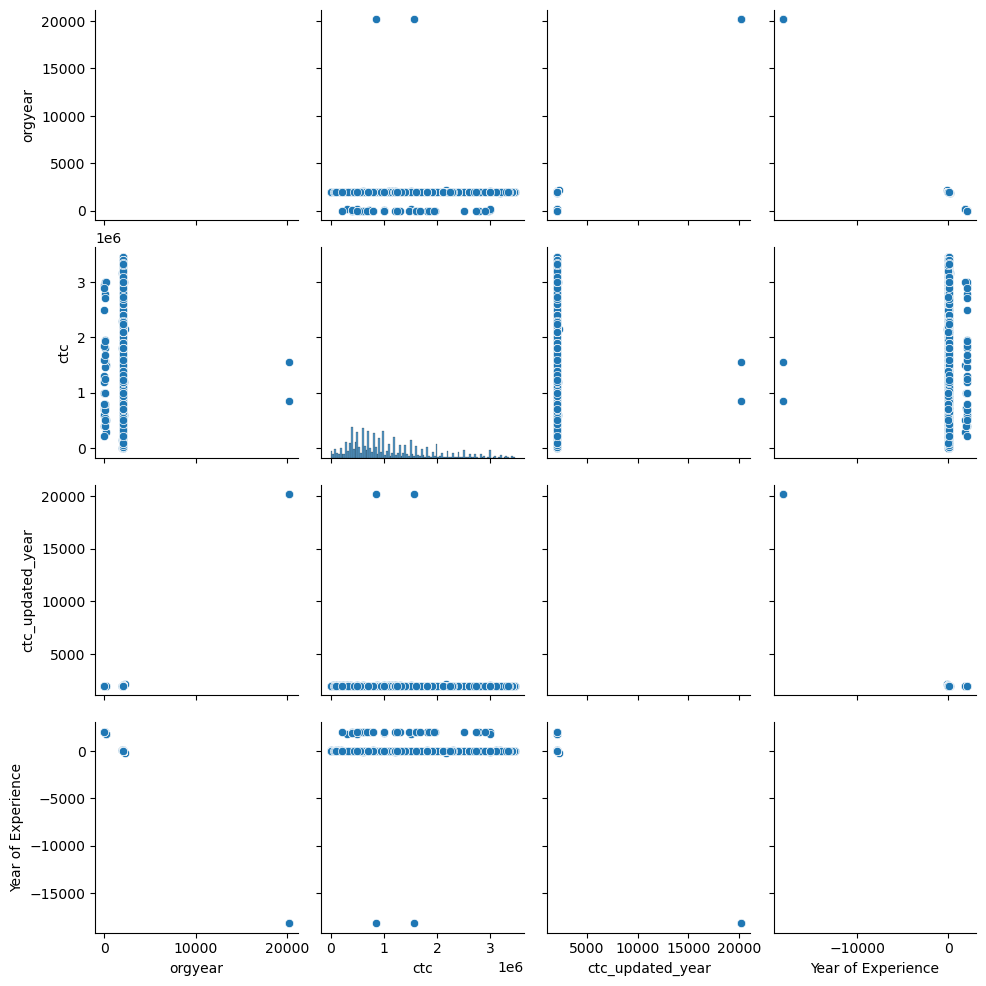

In [33]:
sns.pairplot(df)

There is no significant correlation that can be noticed.

## Manual Clustering 

### Company’s department having same Years of Experience 

In [34]:
grouped_ce = df.groupby(['company_hash', 'Year of Experience'])

Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience

In [35]:
ctc_summary_ce = grouped_ce['ctc'].describe()[['mean', '50%', 'max', 'min', 'count']]
ctc_summary_ce = ctc_summary_ce.rename(columns={'50%': 'median'})

In [36]:
merged_df_ce = df.merge(ctc_summary_ce, on=['company_hash', 'Year of Experience'])

In [37]:
merged_df_ce.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0,1.100000e+06,1100000.0,1100000.0,1100000.0,1.0
1,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
2,18817,8dcec4009f7a5bdd8c6a2af379b5763816563e25d814d0...,2018.0,700000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
3,18817,f4fa64972185ac2b73e99c0cc10d1bf50d6dbfbc9a2cba...,2018.0,620000,276,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
4,18817,be3bcde831f8816f2bad9781f1282f09908f803c2fafb3...,2018.0,950000,276,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
5,18817,3fde2d8b375672193f1a7a7785ba20d0f47f019f01f104...,2018.0,1070000,136,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
6,18817,e863bbe699c9168980e7ae5643c16671ea812d2d433cbf...,2018.0,600000,136,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
7,18817,ddf45c7b7bd4c461890121c416b2fdff9ba34fbaea2ad4...,2018.0,750000,276,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
8,18817,2ab5a1559304d74d3698a203bd8d0555e67e1895244309...,2018.0,900000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0
9,18817,04b77ebfcc101c3dbb390a157b110b31646d6d7c71e650...,2018.0,500000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0


In [38]:
avg_ctc_ce = merged_df_ce.groupby(['company_hash', 'Year of Experience'])['mean'].transform('mean')
merged_df_ce['Class Flag'] = merged_df_ce.apply(lambda row: 0 if row['ctc'] < avg_ctc_ce[row.name] else (1 if row['ctc'] == avg_ctc_ce[row.name] else 2), axis=1)

In [39]:
merged_df_ce.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Class Flag
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0,1.100000e+06,1100000.0,1100000.0,1100000.0,1.0,1
1,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,0
2,18817,8dcec4009f7a5bdd8c6a2af379b5763816563e25d814d0...,2018.0,700000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,0
3,18817,f4fa64972185ac2b73e99c0cc10d1bf50d6dbfbc9a2cba...,2018.0,620000,276,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,0
4,18817,be3bcde831f8816f2bad9781f1282f09908f803c2fafb3...,2018.0,950000,276,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,2
5,18817,3fde2d8b375672193f1a7a7785ba20d0f47f019f01f104...,2018.0,1070000,136,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,2
6,18817,e863bbe699c9168980e7ae5643c16671ea812d2d433cbf...,2018.0,600000,136,2021.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,0
7,18817,ddf45c7b7bd4c461890121c416b2fdff9ba34fbaea2ad4...,2018.0,750000,276,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,2
8,18817,2ab5a1559304d74d3698a203bd8d0555e67e1895244309...,2018.0,900000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,2
9,18817,04b77ebfcc101c3dbb390a157b110b31646d6d7c71e650...,2018.0,500000,136,2020.0,5.0,7.433384e+05,630000.0,2100000.0,10000.0,65.0,0


In [40]:
merged_df_ce['Class Flag'].value_counts()

0    75681
2    59420
1    57505
Name: Class Flag, dtype: int64

most people are payed less than the average salary in the same YOE and company.

### Company & Job Position level

In [41]:
grouped_cj = df.groupby(['company_hash', 'job_position'])

In [42]:
ctc_summary_cj = grouped_cj['ctc'].describe()[['mean', '50%', 'max', 'min', 'count']]
ctc_summary_cj = ctc_summary_cj.rename(columns={'50%': 'median'})

In [43]:
merged_df_cj = df.merge(ctc_summary_cj, on=['company_hash', 'job_position'])

In [44]:
avg_ctc = merged_df_cj.groupby(['company_hash', 'job_position'])['mean'].transform('mean')
merged_df_cj['Designation Flag'] = merged_df_cj.apply(lambda row: 0 if row['ctc'] < avg_ctc[row.name] else (1 if row['ctc'] == avg_ctc[row.name] else 2), axis=1)

In [45]:
merged_df_cj.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Designation Flag
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0,1.085000e+06,1085000.0,1100000.0,1070000.0,2.0,2
1,921,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,437,2018.0,9.0,1.085000e+06,1085000.0,1100000.0,1070000.0,2.0,0
2,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
3,18817,f4fa64972185ac2b73e99c0cc10d1bf50d6dbfbc9a2cba...,2018.0,620000,276,2020.0,5.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
4,18817,51c50fc9fc8c8025ba1e81fd9e7eec377cbda8ba6d9be9...,2019.0,300000,276,2019.0,4.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
5,18817,a667070253210eb966557cc00fd4c6fa0b92dcdf8316b0...,2009.0,1000000,276,2021.0,14.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,2
6,18817,be3bcde831f8816f2bad9781f1282f09908f803c2fafb3...,2018.0,950000,276,2021.0,5.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
7,18817,1fe7524aa9dc2ae9ee2eb02f36078a9c644f987576eb59...,2016.0,600000,276,2020.0,7.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
8,18817,ddf45c7b7bd4c461890121c416b2fdff9ba34fbaea2ad4...,2018.0,750000,276,2020.0,5.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0
9,18817,73e4f61b4b885458561a27990fe136e4bd9cec2425c5d9...,2019.0,470000,276,2020.0,4.0,9.511363e+05,800000.0,2000000.0,300000.0,22.0,0


In [46]:
merged_df_cj['Designation Flag'].value_counts()

0    78940
2    60170
1    53574
Name: Designation Flag, dtype: int64

most people are payed less than the average salary in the same position and company.

### Company level

In [47]:
grouped_c = df.groupby(['company_hash'])

In [48]:
ctc_summary_c = grouped_c['ctc'].describe()[['mean', '50%', 'max', 'min', 'count']]
ctc_summary_c = ctc_summary_c.rename(columns={'50%': 'median'})

In [49]:
merged_df_c = df.merge(ctc_summary_c, on=['company_hash'])

In [50]:
avg_ctc = merged_df_c.groupby(['company_hash'])['mean'].transform('mean')
merged_df_c['Tier Flag'] = merged_df_c.apply(lambda row: 0 if row['ctc'] < avg_ctc[row.name] else (1 if row['ctc'] == avg_ctc[row.name] else 2), axis=1)

In [51]:
merged_df_c.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Tier Flag
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
1,921,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,500000,136,2020.0,4.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
2,921,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1700000,198,2020.0,6.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,2
3,921,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1000000,136,2018.0,9.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
4,921,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017.0,600000,32,2021.0,6.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
5,921,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,437,2018.0,9.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
6,921,dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df99...,2014.0,800000,498,2019.0,9.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,0
7,921,ab2b1b176cd5831ff3002043c82b075812a12ba212fa18...,2011.0,1771000,276,2019.0,12.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,2
8,921,0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd4...,2012.0,1500000,581,2018.0,11.0,1.115667e+06,1070000.0,1771000.0,500000.0,9.0,2
9,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0,1.071436e+06,850000.0,3400000.0,10000.0,410.0,0


In [52]:
merged_df_c['Tier Flag'].value_counts()

0    92730
2    68152
1    31802
Name: Tier Flag, dtype: int64

Post people in the scaler are from tire-3 companies looking upskill themself and go for better paying jobs

In [53]:
# merged_df = merged_df.reset_index()
# merged_df['Class'] = merged_df.groupby(['company_hash', 'job_position'])['flag_designation'].transform(lambda x: pd.factorize(x)[0]+1)

In [54]:
# merged_df.head()

In [55]:
# merged_df['Tier'] = merged_df.groupby(['company_hash'])['flag_designation'].apply(lambda x: pd.factorize(x)[0]+1)

In [56]:
# merged_df.head(10)

### Insights of manual clustering

In [57]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 1
merged_df_c[merged_df_c['Tier Flag']==2].sort_values("ctc",ascending=False)[:11]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Tier Flag
29246,25302,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014.0,3454500,276,2015.0,9.0,1.535936e+06,1550000.0,3454500.0,2000.0,2672.0,2
28185,25302,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014.0,3454500,136,2015.0,9.0,1.535936e+06,1550000.0,3454500.0,2000.0,2672.0,2
106809,8589,75fd2b1188101968e9484c4847f639d5cef5209dd2c043...,2017.0,3450000,437,2020.0,6.0,1.776009e+06,1800000.0,3450000.0,16000.0,568.0,2
8428,8688,eef4792868a808353396cffb03423aa9104b129c38d041...,2011.0,3450000,239,2019.0,12.0,1.561500e+06,1500000.0,3450000.0,10000.0,118.0,2
14850,7905,7b6995298e4316fdec117300a3b5c4ee41afa066e6f684...,2017.0,3450000,276,2020.0,6.0,1.931054e+06,2350000.0,3450000.0,3900.0,101.0,2
8246,22546,b33d333397fc063e1998525575001af3333791e6dc74f8...,2013.0,3450000,239,2019.0,10.0,1.073176e+06,900000.0,3450000.0,7500.0,350.0,2
27119,25302,bc2eeaf42c9a587210d05557903b2d15e50914662d5e18...,2015.0,3450000,551,2015.0,8.0,1.535936e+06,1550000.0,3454500.0,2000.0,2672.0,2
92053,3624,963791cbc30c869e8914c149005c941a5ee8015c5b0a43...,2013.0,3450000,136,2019.0,10.0,1.996276e+06,2200000.0,3450000.0,5000.0,1524.0,2
133069,33269,0ca1da3746df85369fff483d0ed3ddabbe34133aa7ff94...,2017.0,3450000,136,2020.0,6.0,2.033200e+06,2000000.0,3450000.0,100000.0,70.0,2
48423,2452,6a78c17f9caffac82f220864136182acd248ba4a824004...,2011.0,3450000,276,2020.0,12.0,1.951069e+06,2000000.0,3450000.0,170000.0,58.0,2


In [58]:
# Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1
merged_df_cj[(merged_df_cj['Designation Flag']==2) & ((merged_df_cj['job_position']==1017) | (merged_df_cj['job_position']==140))].sort_values("ctc",ascending=False)[:11]



,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Designation Flag


In [59]:
# Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

merged_df_cj[(merged_df_cj['Designation Flag']==0) & ((merged_df_cj['job_position']==1017) | (merged_df_cj['job_position']==140))].sort_values("ctc",ascending=True)[:11]




,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Designation Flag


In [60]:
# Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

merged_df_c[merged_df_c['Tier Flag']==0].sort_values("ctc",ascending=True)[:11]


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Tier Flag
97894,32572,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,136,2019.0,9.0,1.073435e+06,900000.0,3250000.0,2.0,69.0,0
97888,32572,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,958,2018.0,10.0,1.073435e+06,900000.0,3250000.0,2.0,69.0,0
97886,32572,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,958,2018.0,10.0,1.073435e+06,900000.0,3250000.0,2.0,69.0,0
189649,31288,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,958,2018.0,7.0,1.550000e+01,15.5,16.0,15.0,2.0,0
157919,8244,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,958,2022.0,1.0,3.140000e+04,4000.0,90000.0,200.0,3.0,0
44008,12918,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,136,2017.0,11.0,5.741367e+05,450000.0,3400000.0,600.0,8221.0,0
66974,7149,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,276,2021.0,5.0,1.419244e+06,1250000.0,3400000.0,600.0,449.0,0
103476,35338,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,958,2023.0,0.0,1.056870e+06,900000.0,3400000.0,600.0,1616.0,0
59500,21220,1694233be08738b7b50bdb7649b792f0ab8a514c01bec9...,2016.0,1000,958,2019.0,7.0,7.292778e+05,680000.0,2000000.0,1000.0,54.0,0
83123,31011,4eea97c023bd58395edce18538831df9a735180f88f79d...,2020.0,1000,958,2020.0,3.0,9.843383e+05,800000.0,3400000.0,1000.0,480.0,0


In [61]:
# Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

merged_df_ce[(merged_df_ce['Class Flag']==2) & (merged_df_ce['company_hash']==18817)]



,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience,mean,median,max,min,count,Class Flag


In [62]:
# Top 10 companies (based on their CTC)
merged_df_c.groupby('company_hash').agg({'ctc': 'mean'}).sort_values("ctc",ascending=False)[:11]



,ctc
company_hash,
5882,3450000.0
31932,3450000.0
20536,3450000.0
8224,3450000.0
8466,3450000.0
12892,3440000.0
6823,3440000.0
8590,3440000.0
11032,3429999.0


In [63]:
# Top 2 positions in every company (based on their CTC)

company_positions_ctc_sorted=merged_df_c.groupby(['company_hash','job_position']).agg({'ctc': 'mean'}).sort_values(['company_hash',"ctc"],ascending=[True,False])
company_positions_ctc_sorted=company_positions_ctc_sorted.reset_index()
top_positions = pd.DataFrame()
for company in company_positions_ctc_sorted['company_hash'].unique():
    top_positions = top_positions.append(company_positions_ctc_sorted[company_positions_ctc_sorted['company_hash'] == company].head(2))


In [64]:
top_positions

,company_hash,job_position,ctc
0,0,437,100000.0
1,0,958,100000.0
2,1,437,300000.0
3,10,271,1650000.0
4,100,469,2500000.0
...,...,...,...
67913,9996,464,1300000.0
67914,9996,498,660000.0
67916,9997,958,220000.0
67917,9998,198,900000.0


In [65]:
company_positions_ctc_sorted

,company_hash,job_position,ctc
0,0,437,100000.0
1,0,958,100000.0
2,1,437,300000.0
3,10,271,1650000.0
4,100,469,2500000.0
...,...,...,...
67914,9996,498,660000.0
67915,9996,136,220000.0
67916,9997,958,220000.0
67917,9998,198,900000.0


## Unsupervised Learning - Clustering

In [66]:
X=df

In [67]:
X.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year of Experience
0,921,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,437,2020.0,7.0
1,18817,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,276,2019.0,5.0
2,14789,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,136,2020.0,8.0
3,11533,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,136,2019.0,6.0
4,19288,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,276,2019.0,6.0


In [68]:
X.drop(columns=['orgyear','email_hash'],inplace=True,axis=1)

### Normalizing data using standard scaler

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [70]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [71]:
scaled_df.head()

,company_hash,ctc,job_position,ctc_updated_year,Year of Experience
0,-1.664776,0.020617,-0.081665,0.001995,-0.013813
1,0.002046,-0.845118,-0.565672,-0.015106,-0.044398
2,-0.373119,1.219326,-0.986547,0.001995,0.001480
3,-0.676381,-0.512142,-0.986547,-0.015106,-0.029105
4,0.045915,0.420187,-0.565672,-0.015106,-0.029105


### Checking for missing values and Prepare data for KNN/ Mean Imputation.

In [72]:
from sklearn.impute import KNNImputer
k = 3
imputer = KNNImputer(n_neighbors=k)
imputed_data = imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)

In [73]:
imputed_df.isnull().sum()

company_hash          0
ctc                   0
job_position          0
ctc_updated_year      0
Year of Experience    0
dtype: int64

### Elbow method

In [74]:
from sklearn.cluster import KMeans
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imputed_df)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

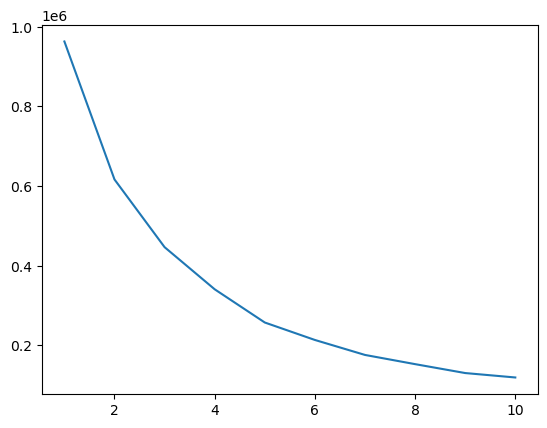

In [75]:
sns.lineplot(k_range,wcss)

2 and 5 can be the number of cluster

### K-means clustering

In [87]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [88]:
kmeans.fit(imputed_df)
labels = kmeans.labels_
imputed_df["cluster"] = labels

In [89]:
imputed_df.head()

,company_hash,ctc,job_position,ctc_updated_year,Year of Experience,cluster
0,-1.664776,0.020617,-0.081665,0.001995,-0.013813,1
1,0.002046,-0.845118,-0.565672,-0.015106,-0.044398,1
2,-0.373119,1.219326,-0.986547,0.001995,0.001480,0
3,-0.676381,-0.512142,-0.986547,-0.015106,-0.029105,1
4,0.045915,0.420187,-0.565672,-0.015106,-0.029105,0


In [90]:
imputed_df.shape

(192684, 6)

### Hierarchical clustering (With sampling)

In [91]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6)

In [92]:
imputed_df_hi=imputed_df.drop('cluster',axis=1)

In [93]:
imputed_df_hi=imputed_df_hi[:10000]

In [94]:
clustering.fit(imputed_df_hi)

AgglomerativeClustering(n_clusters=6)

In [95]:
labels = clustering.labels_
imputed_df_hi["cluster"] = labels

In [96]:
imputed_df_hi.head(10)

,company_hash,ctc,job_position,ctc_updated_year,Year of Experience,cluster
0,-1.664776,0.020617,-0.081665,0.001995,-0.013813,0
1,0.002046,-0.845118,-0.565672,-0.015106,-0.044398,0
2,-0.373119,1.219326,-0.986547,0.001995,0.001480,1
3,-0.676381,-0.512142,-0.986547,-0.015106,-0.029105,0
4,0.045915,0.420187,-0.565672,-0.015106,-0.029105,0
5,1.410500,-0.512142,-0.565672,0.001995,-0.044398,3
6,-0.849248,0.553377,-0.565672,-0.015106,-0.044398,0
7,0.839742,-0.911712,-0.986547,-0.015106,-0.059691,3
8,0.505465,-0.845117,1.484592,0.001995,-0.074983,4
9,1.193206,-0.964988,1.484592,-0.015106,-0.059691,4


Text(0, 0.5, 'distance')

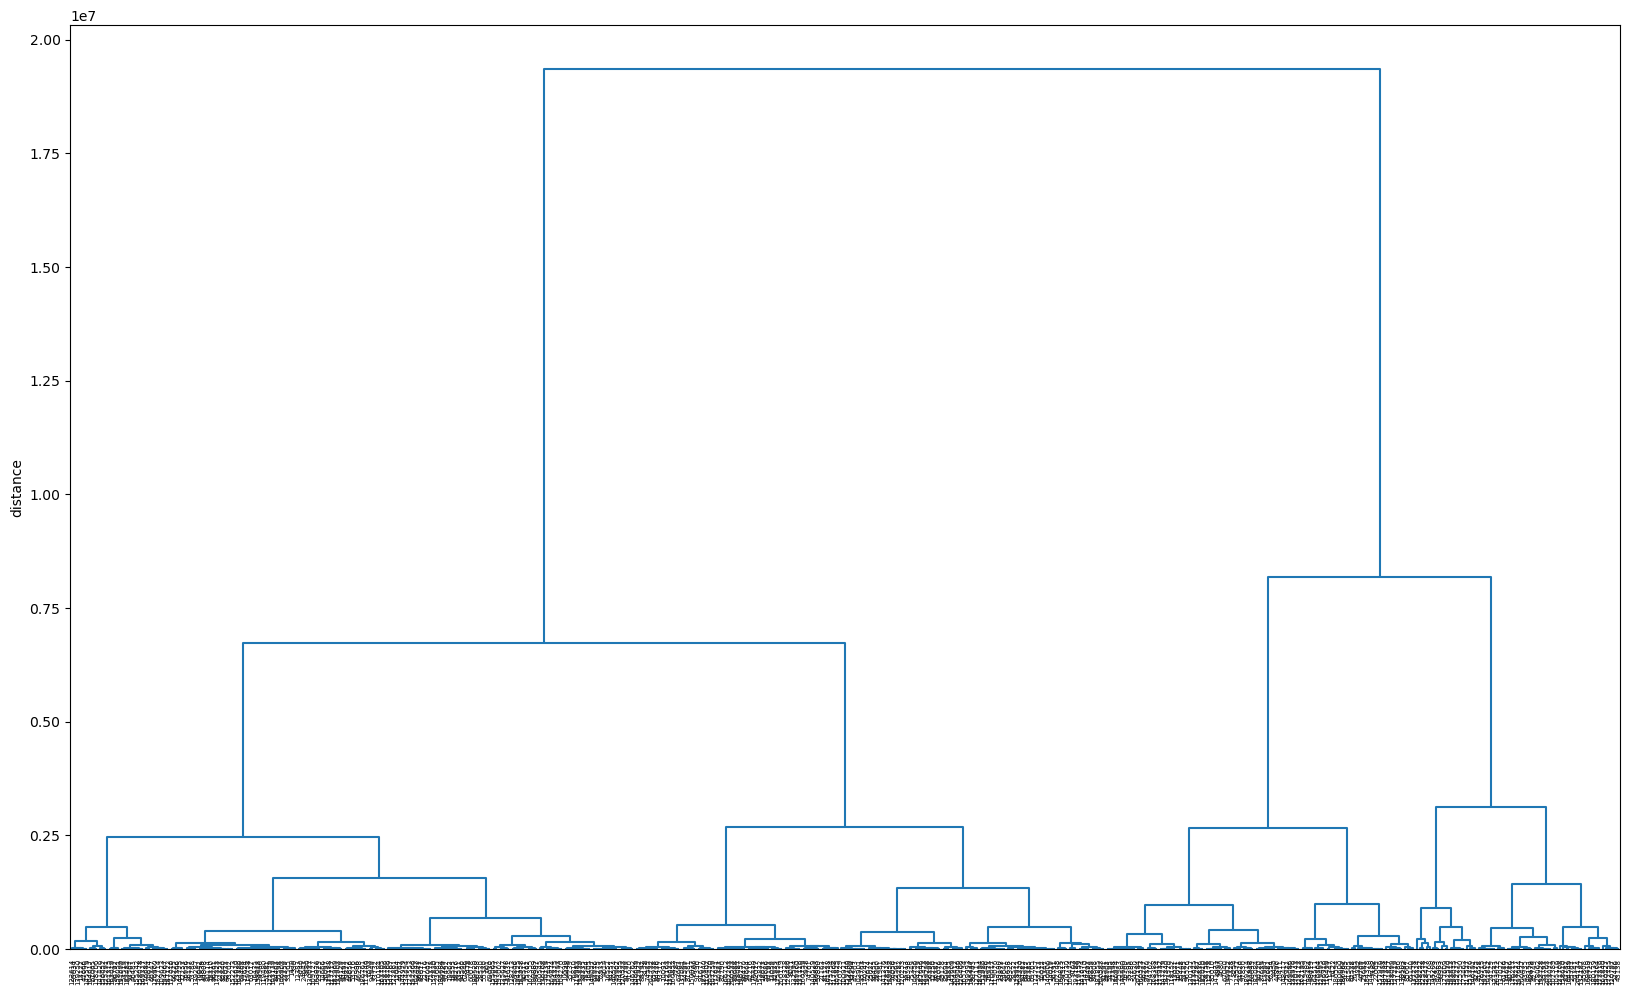

In [101]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = df.sample(500)
Z = sch.linkage(sample, method= 'ward')
fig, ax = plt.subplots (figsize= (20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Here dendogram indicates 2 clusters

## Actionable Insights

- Start by researching industry salaries for the positions in question. This can help you determine if the company's salaries are competitive with those in the industry.

- Check for any potential biases that may be affecting salaries, such as gender or race. Take steps to address any biases that are identified.



## Recommendations

- If you are currently working at a tier-1 company and looking for a new placement, it would be recommended to consider other tier-1 companies or top-tier startups within your industry. These companies typically have similar cultures, resources, and expectations, which can make for a smoother transition.

- For individuals working in tier-2 companies, which are smaller than tier-1 companies but still relatively large and successful, it may be beneficial to consider similar-sized companies within your industry, or potentially tier-1 companies if you have relevant experience and qualifications.

- For those working in tier-3 companies, which are typically smaller and less well-known, it may be helpful to seek out other companies of similar size and scope, as well as startups or mid-tier companies that can offer new opportunities for growth and development.

- Salary negotitation assistance to newly selected candidate for fair salary.

- Target people who are in initial time in there carrier, or look for people who are trying to switch thier profession

In [ ]:
pip uninstall matplotlib

In [ ]:
pip install matplotlib